In [1]:
import numpy as np
import re

In [2]:
def sub_letters(sink):
    from re import sub
    sink = sink.lower()
    return sub(pattern=r'\w*', repl='', string=sink) 

In [3]:
sink_list = []
with open('sink.txt') as sf:
    for line in sf.readlines():
        line = line[:-2]    # 去掉 \n
#         sub_letters(line)
        line = sub_letters(line)
        sink_list.append(str(line))
sink_list = np.array(sink_list)
print(sink_list.shape)
print(sink_list[:10])

raw_sink_list = []
with open('sink.txt') as sf:
    for line in sf.readlines():
        line = line[:-2]    # 去掉 \n
        raw_sink_list.append(str(line))
raw_sink_list = np.array(raw_sink_list)
print(raw_sink_list.shape)
print(raw_sink_list[:10])

(10080,)
['$' '" {  :\\"". $ ."\\" ; }"' '$' '"< =". $ ."></>"' '$'
 '" {  :". $ ." ; }"' '$' '$' '"< =\\" :". $ ."\\"></>"'
 '"< =\\" :". $ ."\\"></>"']
(10080,)
['$tainted' '"body { color :\\"". $tainted ."\\" ; }"' '$tainted'
 '"<div id=". $tainted .">content</div>"' '$tainted'
 '"body { color :". $tainted ." ; }"' '$tainted' '$tainted'
 '"<span style=\\"color :". $tainted ."\\">Hey</span>"'
 '"<span style=\\"color :". $tainted ."\\">Hey</span>"']


# 特征提取函数

In [4]:
from collections import Counter

# 特征抽取helper
def get_index_list(sub, s):
    index_list = []
    index = s.find(sub)
    while index != -1:
        index_list.append(int(index))
        index = s.find(sub,index + 1)
    if len(index_list) > 0:
        return index_list
    else:
        return -1


def get_freq_dict(sink):
    freq_dict = dict(Counter(sink))
    return freq_dict


# ************************* 特征抽取 *************************
def dollar_index(sink):
    sink = str(sink).lower()
    return sink.find('$')


def length_of_sink(sink):
    return len(str(sink).lower())


def count_angle(sink):
    return str(sink).lower().count('<')



def count_brace(sink):
    return str(sink).lower().count('{')


def count_double_quotes(sink):
    return str(sink).lower().count('\"')


def count_single_quotes(sink):
    return str(sink).lower().count('\'')


def count_slash(sink):
    return str(sink).lower().count('\/')
    
    
def count_anti_slash(sink):
    return str(sink).lower().count('\\')


def count_parenthesis(sink):
    return str(sink).lower().count('(')


def count_colon(sink):
    return str(sink).lower().count(':')


def dollar_inside_angle(sink):
    left_paren_pos = get_index_list('<', sink)
    if left_paren_pos == -1:
        return -1
    right_paren_pos = get_index_list('>', sink)
    if right_paren_pos == -1:
        return -1
    dollar_pos = get_index_list('$', sink)
    if dollar_pos == -1:
        return -1
    for left, right in zip(left_paren_pos, right_paren_pos):
#         print(left)
#         print(right)
        for dollar in dollar_pos:
#             print(dollar)
            if left < dollar and dollar < right:
                return 1
    return -1
    
    
def dollar_inside_paren(sink):
    left_paren_pos = get_index_list('(', sink)
    if left_paren_pos == -1:
        return -1
    right_paren_pos = get_index_list(')', sink)
    if right_paren_pos == -1:
        return -1
    dollar_pos = get_index_list('$', sink)
    if dollar_pos == -1:
        return -1
    for left, right in zip(left_paren_pos, right_paren_pos):
#         print(left)
#         print(right)
        for dollar in dollar_pos:
#             print(dollar)
            if left < dollar and dollar < right:
                return 1
    return -1


def dollar_inside_brace(sink):
    left_brace_pos = get_index_list('{', sink)
    if left_brace_pos == -1:
        return -1
    right_brace_pos = get_index_list('}', sink)
    if right_brace_pos == -1:
        return -1
    dollar_pos = get_index_list('$', sink)
    if dollar_pos == -1:
        return -1
    for left, right in zip(left_brace_pos, right_brace_pos):
#         print(left)
#         print(right)
        for dollar in dollar_pos:
#             print(dollar)
            if left < dollar and dollar < right:
                return 1
    return -1


def dollar_behind_colon(sink):
    colon_pos = get_index_list(':', sink)
    if colon_pos == -1:
        return -1
    dollar_pos = get_index_list('$', sink)
    if dollar_pos == -1:
        return -1
    for colo in colon_pos:
        for dollar in dollar_pos:
            if colo < dollar:
                return 1
    return -1

feature_func_list = [ dollar_index, count_angle, count_brace,
                      count_double_quotes, count_single_quotes, count_slash,
                      count_anti_slash, count_parenthesis, dollar_inside_angle,
                      dollar_inside_brace, dollar_inside_paren, count_colon, 
                      dollar_behind_colon
                    ]

# 特征抽取

In [5]:
feature_list = []
for sink in sink_list:
    feature = []
    for func in feature_func_list:
        feature.append(func(sink))
    if len(feature) != 0:
        feature_list.append(feature)
    else:
        print('feature extracting error!')
feature_list = np.array(feature_list)
# X_std = 1.0 * (feature_list - feature_list.mean()) / feature_list.std()
X_std = feature_list
print(X_std.shape)

(10080, 13)


# 开始聚类

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
model = KMeans(n_clusters=17, max_iter=100, tol=1e-4, verbose=2)
model.fit(X_std)
# label_pred = model.labels_

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.9064602592576853e-22
center shift 7.397796e-13 within tolerance 2.089308e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.9064602592576853e-22
center shift 7.397796e-13 within tolerance 2.089308e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.9064602592576853e-22
center shift 7.397796e-13 within tolerance 2.089308e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.9064602592576853e-22
center shift 7.397796e-13 within tolerance 2.089308e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.9064602592576853e-22
center shift 7.397796e-13 within tolerance 2.089308e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2.9064602592576853e-22
center shift 7.397796e-13 within tolerance 2.089

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=2)

In [7]:
#简单打印结果
import pandas as pd

std_features_df = pd.DataFrame(X_std)
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
r.columns = list(std_features_df.columns) + [u'类别数目'] #重命名表头
print(r)


               0             1             2             3             4    5  \
0   9.000000e+00  2.000000e+00 -9.714451e-16  6.000000e+00 -3.885781e-15  0.0   
1   3.197442e-13 -1.654232e-14 -4.135581e-15  1.172396e-13 -1.654232e-14  0.0   
2   7.000000e+00 -3.885781e-15 -9.714451e-16  4.000000e+00  2.000000e+00  0.0   
3   1.100000e+01 -3.885781e-15  1.000000e+00  4.000000e+00  2.000000e+00  0.0   
4   7.000000e+00  2.000000e+00 -9.714451e-16  4.000000e+00 -3.885781e-15  0.0   
5   1.200000e+01  1.000000e+00 -9.714451e-16  6.000000e+00 -3.885781e-15  0.0   
6   7.000000e+00 -3.885781e-15 -9.714451e-16  6.000000e+00 -3.885781e-15  0.0   
7   9.000000e+00  2.000000e+00 -9.714451e-16  4.000000e+00  2.000000e+00  0.0   
8   9.000000e+00 -3.885781e-15  1.000000e+00  4.000000e+00 -3.885781e-15  0.0   
9   6.000000e+00  1.000000e+00 -9.714451e-16  6.000000e+00 -3.885781e-15  0.0   
10  1.100000e+01  1.000000e+00 -9.714451e-16  4.000000e+00  2.000000e+00  0.0   
11  1.100000e+01  2.000000e+

In [8]:
import pandas as pd

r = pd.concat([std_features_df, pd.Series(model.labels_, index = std_features_df.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(std_features_df.columns) + [u'聚类类别'] #重命名表头
# r.to_excel('outputfile') #保存结果

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(std_features_df) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = std_features_df.index) #转换数据格式


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


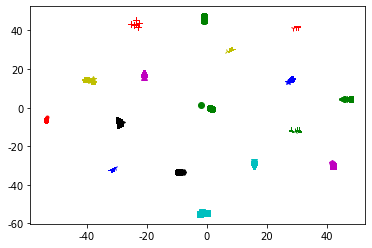

In [10]:
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'y*')
d = tsne[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'cv')
d = tsne[r[u'聚类类别'] == 5]
plt.plot(d[0], d[1], 'm^')
d = tsne[r[u'聚类类别'] == 6]
plt.plot(d[0], d[1], 'g<')
d = tsne[r[u'聚类类别'] == 7]
plt.plot(d[0], d[1], 'k>')
d = tsne[r[u'聚类类别'] == 8]
plt.plot(d[0], d[1], 'r1')
d = tsne[r[u'聚类类别'] == 9]
plt.plot(d[0], d[1], 'g2')
d = tsne[r[u'聚类类别'] == 10]
plt.plot(d[0], d[1], 'b3')
d = tsne[r[u'聚类类别'] == 11]
plt.plot(d[0], d[1], 'y4')
d = tsne[r[u'聚类类别'] == 12]
plt.plot(d[0], d[1], 'cs')
d = tsne[r[u'聚类类别'] == 13]
plt.plot(d[0], d[1], 'mp')
d = tsne[r[u'聚类类别'] == 14]
plt.plot(d[0], d[1], 'gh')
d = tsne[r[u'聚类类别'] == 15]
plt.plot(d[0], d[1], 'kH')
d = tsne[r[u'聚类类别'] == 16]
plt.plot(d[0], d[1], 'r+')
plt.show()

In [11]:
kmeans_cluster_df = pd.concat([label_pd.DataFrame(sink_list, columns=['sink']), r], axis = 1)
kmeans_cluster_df.to_csv('kmeans_cluster.csv', index=None)

NameError: name 'label_pd' is not defined

In [15]:
old_df = pd.read_csv('./../php_xss_datasets.csv')

old_df['sink'] = raw_sink_list
old_df['sink_type'] = model.labels_

print(old_df.shape)

old_df.to_csv('./../php_xss_datasets.csv', index=None, encoding='utf-8')

(10080, 7)


In [14]:
from joblib import dump

dump(model, 'sink_cluster_kmeans.model')

['sink_cluster_kmeans.model']

In [92]:
model.predict

True

In [13]:
from extract_sink_features import get_sink_features

sink_test = '"body { font :". $tainted ." ; }"'
features = np.array(get_sink_features(sink_test))
print(model.predict(features.reshape(1, -1)))

[8]
